<a href="https://colab.research.google.com/github/irwanmaulana42/google-collab/blob/master/tb1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kelompok: <br>
1. Irwan Maulana - 41519120030 <br>
2. Laura Zulia Sofianah - 41519120015 <br>
3. Devana Azzahra Salam - 415191.....

Algoritma Decision Tree

DATA TRAINING
    panjang_sepal  lebar_sepal  panjang_kelopak  lebar_kelopak  \
0             5.1          3.5              1.4            0.2   
1             4.9          3.0              1.4            0.2   
2             4.7          3.2              1.3            0.2   
3             4.6          3.1              1.5            0.2   
4             5.0          3.6              1.4            0.2   
5             7.0          3.2              4.7            1.4   
6             6.4          3.2              4.5            1.5   
7             6.9          3.1              4.9            1.5   
8             5.5          2.3              4.0            1.3   
9             6.5          2.8              4.6            1.5   
10            6.3          3.3              6.0            2.5   
11            5.8          2.7              5.1            1.9   
12            7.1          3.0              5.9            2.1   
13            6.3          2.9              5.6            1.8

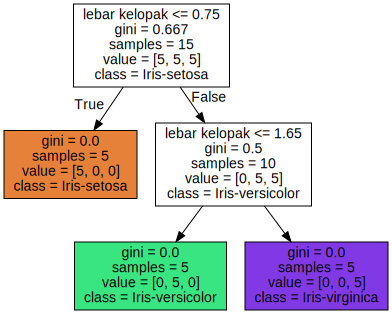

In [68]:
import pandas as pd
import numpy as np
from graphviz import Source

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import json
from urllib.request import urlopen
from sklearn.metrics import classification_report

def extractJson(value, types):
  if(types == 'X_train'):
    return [value['panjang_sepal'], value['lebar_sepal'], value['panjang_kelopak'], value['lebar_kelopak']]
  else:
    return value['label']

f = urlopen('https://raw.githubusercontent.com/irwanmaulana42/google-collab/master/sample_data.json')
myfile = f.read()
sample_data = json.loads(myfile);

print("DATA TRAINING")
print(pd.DataFrame(sample_data, columns=['panjang_sepal', 'lebar_sepal', 'panjang_kelopak', 'lebar_kelopak', 'label']), '\n\n')

X_train = list(map(lambda value: extractJson(value, types='X_train'), sample_data))
Y_train = list(map(lambda value: extractJson(value, types='Y_train'), sample_data))

TreeClassifier = DecisionTreeClassifier(max_depth=4);

TreeClassifier.fit(X_train, Y_train)

unlabelled = [[5.4, 3.9, 1.7, 0.4], [5.2, 2.7, 3.9, 1.4], [7.6, 3, 6.6, 2.1], [6.3, 2.7, 4.9, 1.8]]

print("DATA PREDICT")
print(pd.DataFrame(unlabelled, columns=['panjang_sepal', 'lebar_sepal', 'panjang_kelopak', 'lebar_kelopak']), '\n\n')

hasil = TreeClassifier.predict(unlabelled)

print("HASIL OUTPUT:")
print(hasil, '\n\n')

# Grafik
fn=['Panjang sepal','Lebar sepal','panjang kelopak','lebar kelopak']
cn=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

tree.export_graphviz(TreeClassifier,
                     out_file="tree.dot",
                     feature_names = fn, 
                     class_names=cn,
                     filled = True)

Source.from_file('/content/tree.dot')


# Evaluasi Report
# y_pred = TreeClassifier.predict(unlabelled);
# print(classification_report(hasil, y_pred))


Algoritma k-NN

   panjang_sepal  lebar_sepal  panjang_kelopak  lebar_kelopak        label
0            5.1          3.5              1.4            0.2  Iris-setosa
1            4.9          3.0              1.4            0.2  Iris-setosa
2            4.7          3.2              1.3            0.2  Iris-setosa
3            4.6          3.1              1.5            0.2  Iris-setosa
4            5.0          3.6              1.4            0.2  Iris-setosa
   panjang_sepal  lebar_sepal  panjang_kelopak  lebar_kelopak
0            5.4          3.9              1.7            0.4
1            5.2          2.7              3.9            1.4
2            7.6          3.0              6.6            2.1
3            6.3          2.7              4.9            1.8
HASIL OUTPUT:  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor']


<Figure size 720x396 with 0 Axes>

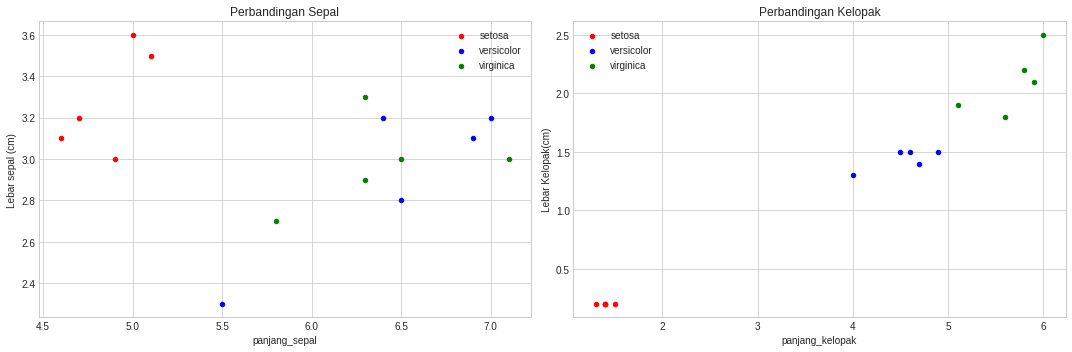

In [117]:
from sklearn.neighbors import KNeighborsClassifier
import json
from urllib.request import urlopen
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
import pandas as pd # import file menggunakan pandas

import matplotlib.pyplot as plt
def extractJson(value, types):
  if(types == 'X_train'):
    return [value['panjang_sepal'], value['lebar_sepal'], value['panjang_kelopak'], value['lebar_kelopak']]
  elif(types == 'Y_train'):
    return value['label']
  else :
    return [value['panjang_sepal'], value['lebar_sepal'], value['panjang_kelopak'], value['lebar_kelopak'], value['label']]
url = 'https://raw.githubusercontent.com/irwanmaulana42/google-collab/master/sample_data.json'
f = urlopen(url)
myfile = f.read()
sample_data = json.loads(myfile);

dataset = pd.read_json(url)
setosa = dataset[dataset['label']=='Iris-setosa']
print(setosa);
versicolor = dataset[dataset['label']=='Iris-versicolor']
virginica = dataset[dataset['label']=='Iris-virginica']

plt.figure()
fig,ax=plt.subplots(1,2,figsize=(15, 5))
setosa.plot(x="panjang_sepal", y="lebar_sepal", kind="scatter",ax=ax[0],label='setosa',color='r')
versicolor.plot(x="panjang_sepal",y="lebar_sepal",kind="scatter",ax=ax[0],label='versicolor',color='b')
virginica.plot(x="panjang_sepal", y="lebar_sepal", kind="scatter", ax=ax[0], label='virginica', color='g')

setosa.plot(x="panjang_kelopak", y="lebar_kelopak", kind="scatter",ax=ax[1],label='setosa',color='r')
versicolor.plot(x="panjang_kelopak",y="lebar_kelopak",kind="scatter",ax=ax[1],label='versicolor',color='b')
virginica.plot(x="panjang_kelopak", y="lebar_kelopak", kind="scatter", ax=ax[1], label='virginica', color='g')

ax[0].set(title='Perbandingan Sepal', ylabel='Lebar sepal (cm)')
ax[1].set(title='Perbandingan Kelopak',  ylabel='Lebar Kelopak(cm)')
ax[0].legend()
ax[1].legend()
plt.savefig('asda.png')


X_train = list(map(lambda value: extractJson(value, types='X_train'), sample_data))
Y_train = list(map(lambda value: extractJson(value, types='Y_train'), sample_data))

kNNClassifier = KNeighborsClassifier(n_neighbors=1);

kNNClassifier.fit(X_train, Y_train)

unlabelled = [[5.4, 3.9, 1.7, 0.4], [5.2, 2.7, 3.9, 1.4], [7.6, 3, 6.6, 2.1], [6.3, 2.7, 4.9, 1.8]]

print(pd.DataFrame(unlabelled, columns=['panjang_sepal', 'lebar_sepal', 'panjang_kelopak', 'lebar_kelopak']))

hasil = kNNClassifier.predict(unlabelled)

print("HASIL OUTPUT: ", hasil)

# print('Classic report', classification_report(y_test, hasil))


   panjang_sepal  lebar_sepal  panjang_kelopak  lebar_kelopak        label
0            5.1          3.5              1.4            0.2  Iris-setosa
1            4.9          3.0              1.4            0.2  Iris-setosa
2            4.7          3.2              1.3            0.2  Iris-setosa
3            4.6          3.1              1.5            0.2  Iris-setosa
4            5.0          3.6              1.4            0.2  Iris-setosa


<Figure size 720x396 with 0 Axes>

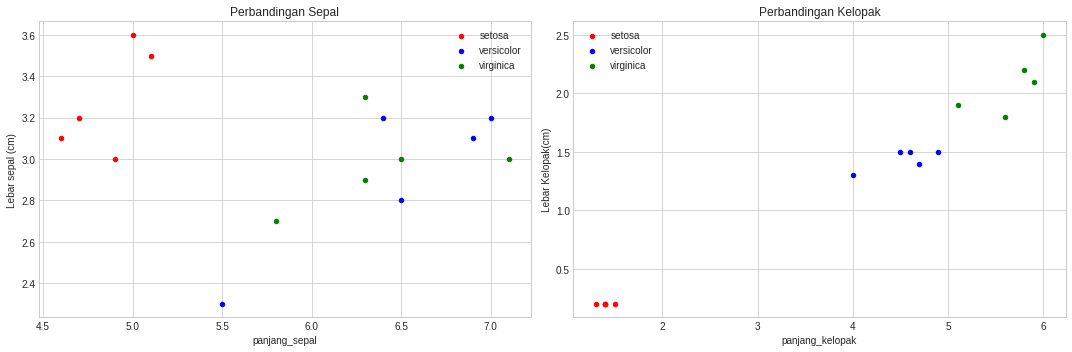

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

def extractJson(value, types):
  if(types == 'X_train'):
    return [value['panjang_sepal'], value['lebar_sepal'], value['panjang_kelopak'], value['lebar_kelopak']]
  elif(types == 'Y_train'):
    return value['label']
  else :
    return [value['panjang_sepal'], value['lebar_sepal'], value['panjang_kelopak'], value['lebar_kelopak'], value['label']]

f = urlopen('https://raw.githubusercontent.com/irwanmaulana42/google-collab/master/sample_data.json')
myfile = f.read()
import pandas as pd # import file menggunakan pandas

import matplotlib.pyplot as plt
dataset = pd.read_json('https://raw.githubusercontent.com/irwanmaulana42/google-collab/master/sample_data.json')
setosa = dataset[dataset['label']=='Iris-setosa']
print(setosa);
versicolor = dataset[dataset['label']=='Iris-versicolor']
virginica = dataset[dataset['label']=='Iris-virginica']

plt.figure()
fig,ax=plt.subplots(1,2,figsize=(15, 5))
setosa.plot(x="panjang_sepal", y="lebar_sepal", kind="scatter",ax=ax[0],label='setosa',color='r')
versicolor.plot(x="panjang_sepal",y="lebar_sepal",kind="scatter",ax=ax[0],label='versicolor',color='b')
virginica.plot(x="panjang_sepal", y="lebar_sepal", kind="scatter", ax=ax[0], label='virginica', color='g')

setosa.plot(x="panjang_kelopak", y="lebar_kelopak", kind="scatter",ax=ax[1],label='setosa',color='r')
versicolor.plot(x="panjang_kelopak",y="lebar_kelopak",kind="scatter",ax=ax[1],label='versicolor',color='b')
virginica.plot(x="panjang_kelopak", y="lebar_kelopak", kind="scatter", ax=ax[1], label='virginica', color='g')

ax[0].set(title='Perbandingan Sepal', ylabel='Lebar sepal (cm)')
ax[1].set(title='Perbandingan Kelopak',  ylabel='Lebar Kelopak(cm)')
ax[0].legend()
ax[1].legend()
plt.savefig('asda.png')


